# Central Potential - AG mam

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Simpson's 1/3 rd rule for discrete function

In [19]:
def simp13xdis(h,fx):
    n=len(fx)
    I=0
    for i in range(n):
        if i==0 or i==n-1: # i 1st or last
            I+=fx[i]
        elif i%2 !=0: # i odd
            I+=4*fx[i]
        else: #i even
            I+=2*fx[i]
    I=I*h/3
    return I

Wavefunction

In [20]:
def Psi(mhdx2,psi,Vi,E):
    N=len(psi)
    psiE=[psi[i] for i in range(N)]
    for i in range(2,N):
        psiE[i]=2*(mhdx2*(Vi[i]-E)+1)*psiE[i-1]-psiE[i-2]
    return psiE

Normalization

In [21]:
def psiNorm(psi,dx):
    N=len(psi)
    psi2=[psi[i]**2 for i in range(N)]
    psiMod2=simp13xdis(dx,psi2)
    nrmPsi=[psi[i]/psiMod2**0.5 for i in range(N)]
    return nrmPsi


Solving by central difference method

In [22]:

def CntDiffSchr(mhdx2,Vi,psi0,psi1,psiN,nodes,mxItr):
        N=len(Vi)-1
        Emx=max(Vi)
        Emn=min(Vi)
       
        psiIn=[0 for i in range(N+1)]
        
        psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
        itr=0
        while abs(Emx-Emn) > 1e-6 and itr < mxItr:
            E=0.5*(Emx+Emn)
            psi=Psi(mhdx2,psiIn,Vi,E)  # Get wavefunction
            
            cnt=0
            for i in range(1,N-2):
                if psi[i]*psi[i+1] <0:
                    cnt+=1
            if cnt > nodes:
                Emx=E
            elif cnt < nodes:
                Emn=E
            else:
                if psi[N-1] >psiN:
                 Emn=E
                elif psi[N-1] < psiN:
                 Emxx=E

            itr+=1
        if itr < mxItr :
            return E,psi
        else:
            return None, None

Solution of radial equation

$$ \frac{d^2y}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,y $$
Potential:
$$ V(r) = \frac{e^2}{4\pi\epsilon_0 r} \, exp(-r/a) $$

C:\Users\suman\AppData\Local\Temp\ipykernel_9764\3866115073.py:16: RuntimeWarning: overflow encountered in scalar multiply
  if psi[i]*psi[i+1] <0:
C:\Users\suman\AppData\Local\Temp\ipykernel_9764\1413126071.py:5: RuntimeWarning: overflow encountered in scalar multiply
  psiE[i]=2*(mhdx2*(Vi[i]-E)+1)*psiE[i-1]-psiE[i-2]
C:\Users\suman\AppData\Local\Temp\ipykernel_9764\1413126071.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  psiE[i]=2*(mhdx2*(Vi[i]-E)+1)*psiE[i-1]-psiE[i-2]


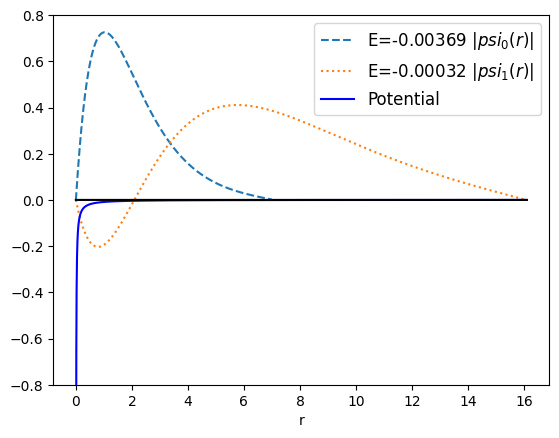

In [26]:
import matplotlib.pyplot as plt
def V(e2,r):
    a=7.5
    return  -e2/r*np.exp(-r/a)
hbar,m=0.1,1
e2=0.01


stln=['--',':','-']
dr=0.005
mxItr=100
R0,RN=1e-4,[7.0,16.1]
psi0,psiN=0,0
# First four eigenfunctions
for nodes in range(2):
    N=int((RN[nodes]-R0)/dr)
    dr=(RN[nodes]-R0)/N
    mhdr2=m*dr**2/hbar**2
    r=[R0+i*dr for i in range(N+1)]
    Vi=[V(e2,r[i]) for i in range(N+1)]
    psi1=(-1)**nodes*1e-4
    E,psi=CntDiffSchr(mhdr2,Vi,psi0,psi1,psiN,nodes,mxItr)
    if E!=None:
        psin=[0 for i in range(N+1)]
        psi=psiNorm(psi,dr)
   
        plt.plot(r,psi,stln[nodes],label=f'E={E:.5f} $ |psi_{nodes}(r)|$')
    
plt.ylim(-0.8,0.8)
plt.plot(r,Vi,'b',label='Potential')
xax=[0 for i in range(N+1)]
plt.plot(r,xax,'k')
plt.xlabel('r')
plt.legend(loc='best',prop={'size':12})
plt.show()
